In [19]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

## Install this on a new system
# nltk.download('punkt')
from nltk.tokenize import word_tokenize


warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')




## Get the overall info from the dataset


In [20]:
## Read the dataset from CSV file

city_df = pd.read_csv("textdata/Dallas-dataset.csv")



In [21]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 1554 non-null   object 
 1   created_at                  1554 non-null   object 
 2   hashtags                    872 non-null    object 
 3   media                       28 non-null     object 
 4   urls                        1539 non-null   object 
 5   favorite_count              1554 non-null   int64  
 6   id                          1554 non-null   int64  
 7   in_reply_to_screen_name     27 non-null     object 
 8   in_reply_to_status_id       12 non-null     float64
 9   in_reply_to_user_id         27 non-null     float64
 10  lang                        1554 non-null   object 
 11  place                       1554 non-null   object 
 12  possibly_sensitive          1546 non-null   object 
 13  retweet_count               1554 

In [22]:
city_df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,"-96.7977,32.7774",Sat Apr 04 19:15:40 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-kfqUVAUBj/?igshi...,0,1246516806216532032,NaN,NaN,NaN,...,1481,1405,11,"30,000 ft in the air",M.A.K.A.V.E.L.I,djmakaveliatl,150386,NaN,https://linktr.ee/djmakaveliatl,False
1,"-96.76968,32.76858",Thu Mar 26 23:00:55 +0000 2020,ComeSeeUs BringAFriend Dallas daiquiri food Ba...,NaN,https://www.instagram.com/p/B-Nusrfpmzt/?igshi...,1,1243312001767682055,NaN,NaN,NaN,...,1089,170,1,2707 Martin Luther King 75215,3D Daiquiri Bar & Grill,3D_DaiquiriBar,12736,NaN,NaN,False
2,"-96.7977,32.7774",Thu Mar 19 21:02:22 +0000 2020,Thursday Thankful Workout shoulders traps delt...,NaN,https://www.instagram.com/p/B97fkSgJKKU/?igshi...,0,1240745453467119624,NaN,NaN,NaN,...,1241,959,48,Dallas,_herbalegend1911,QueB_DaBeastPT,39717,NaN,http://www.goherbalife.com/queb4herba/en-US,False
3,"-97.09276607,32.74781841",Thu Mar 19 21:38:08 +0000 2020,readytoplay drums drummer drummersofinstagram ...,NaN,https://www.instagram.com/p/B97jqCbF0Y8/?igshi...,0,1240754454237818880,NaN,NaN,NaN,...,1362,419,8,Stevo world,steve stewart,drummersteve85,16199,NaN,NaN,False
4,"-96.66200026,33.10249493",Sat Mar 21 21:45:15 +0000 2020,covid_19 quarantine corona,NaN,https://www.instagram.com/p/B-As3RypiRA/?igshi...,0,1241481021478051840,NaN,NaN,NaN,...,539,254,4,"Allen, TX",Tony Mack,TKOTONYMACK,2751,NaN,http://allenboxing.com,False


In [23]:
# ASSIGN Set dataset info 

# toronto_df.info()
# toronto_df.head(5)


## Create a dataframe with a column for tweets
#df_text = toronto_df['text']
# df_text = toronto_df[['text']].convert_dtypes(object,str)

df_text = city_df[['text']].convert_dtypes(object,str)
df_text['created_at'] = city_df[['created_at']].convert_dtypes(object,str)
df_text['place'] = city_df[['place']].convert_dtypes(object,str)
df_text['hashtags'] = city_df[['hashtags']].convert_dtypes(object,str)

# df_timebased_tweets = 
## Perhaps we need the hashtags too
# created_at	, hashtags,  place

#df_text = toronto_df[['hashtags','text']]

#df_text.info()
# df_text.head(10)            

In [24]:
df_text.head(10)    

,text,created_at,place,hashtags
0,2020 B.C. (Before Corona) was a major vibe ......,Sat Apr 04 19:15:40 +0000 2020,"Dallas, TX",<NA>
1,Come Beat The Corona w/ “THE CURE” New Flavor ...,Thu Mar 26 23:00:55 +0000 2020,"Dallas, TX",ComeSeeUs BringAFriend Dallas daiquiri food Ba...
2,"Day 3.... Corona-0, QueRona-3! Workout complet...",Thu Mar 19 21:02:22 +0000 2020,"Dallas, TX",Thursday Thankful Workout shoulders traps delt...
3,Ready to feel the energy again.... corona be g...,Thu Mar 19 21:38:08 +0000 2020,"Arlington, TX",readytoplay drums drummer drummersofinstagram ...
4,TMACK ELITE/HIDDEN GYM MEMBERS GET READY BC HE...,Sat Mar 21 21:45:15 +0000 2020,"Allen, TX",covid_19 quarantine corona
5,Psalms 46! Don’t worry God is in control and H...,Sun Mar 22 17:50:13 +0000 2020,"Desoto, TX",corona coronavirus sundayfunday godisgood god ...
6,Corona virus quarantine got us roasting pickle...,Sat Apr 04 01:23:32 +0000 2020,"Dallas, TX",wherethemarshmellows stayathome
7,Corona At-Home Workout Day 8 * if you are inte...,Fri Mar 20 20:20:39 +0000 2020,"Dallas, TX",<NA>
8,"Ok so, I’ve been holding out. Last Thursday be...",Sun Mar 22 06:08:41 +0000 2020,"Dallas, TX",<NA>
9,OLUWA OVERDO OGIDIGBOIGBO..... CORONA CAN NOT ...,Thu Apr 02 09:14:51 +0000 2020,"Lakeland Heights, TX",<NA>


## Cleaning the text Data

In [102]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Note: remove special charactres and punctuations -
    text = re.sub(r'[^a-zA-Z# ]','',text, flags=re.MULTILINE)
    
    
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    
    #comment these for now
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('igstreet', '', text, flags=re.MULTILINE)   
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    text = re.sub('Toronto', '', text, flags=re.MULTILINE)
    text = re.sub('Ontario', '', text, flags=re.MULTILINE)
    text = re.sub('will', '', text, flags=re.MULTILINE)
    text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [103]:
# pass the text through cleantweet and removeEmoji functions
# s = df_text.iloc[[2]]
df_text['text'] = df_text['text'].apply(cleanTweets)
df_text['text'] = df_text['text'].apply(cleanEmoji)




In [104]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,bc before corona was a major vibe dallas t...,sat apr 04 19:15:40 +0000 2020,dallas,<na>,0.500000,0.062500,positive,bc corona major vibe dalla texa,2020-04-04 19:15:40,4,0
1,come beat the corona w the cure new flavor ale...,thu mar 26 23:00:55 +0000 2020,dallas,comeseeus bringafriend dallas daiquiri food ba...,0.454545,0.136364,positive,come beat corona w cure new flavor alert dai...,2020-03-26 23:00:55,3,0


# A- Sentence Level Analysis

## Start working on the contect and subject area

In [105]:
#create a funct7878ivity(text): 
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns to add the sentiment and polarity
df_text['subjectivity'] = df_text['text'].apply(getSubjectivity)
df_text['polarity'] = df_text['text'].apply(getPolarity)

#Display the new datasetgf


In [106]:
# df_text.head(10)
df_text.to_csv("textdata/myexportfile_dallas.csv")

## Make a WordCloud chart -word frequency map

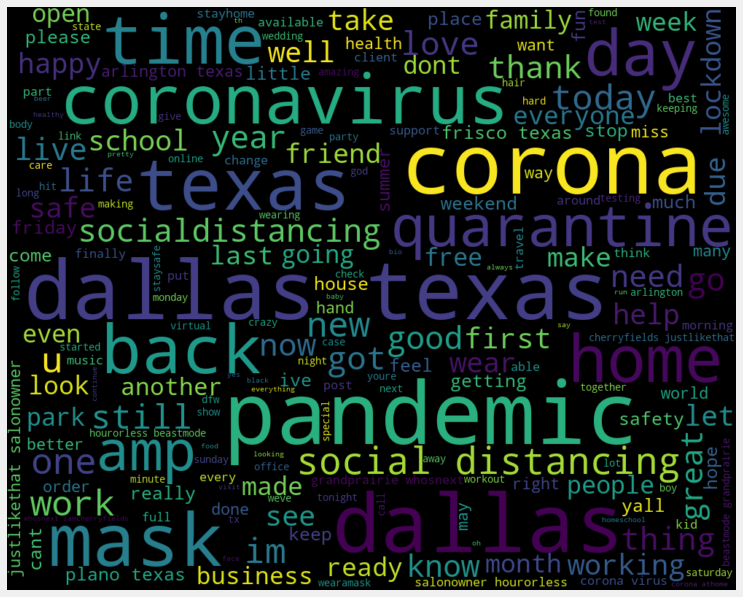

In [107]:
# plot outcome using word cloud
# visualize the most frequency used words
allWords = ' '.join(twts for twts in df_text['text'])

# wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)
wordCloud = WordCloud(width=1000, height=800, random_state=21,max_font_size=119).generate(allWords)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


## Positive and Negative Sentiments

In [108]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['analysis'] = df_text['polarity'].apply(getSentAnalysis)

#df_text


## All Negative Tweets

In [109]:
#print all of the negative tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Negative'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         # print()  #to print uncomment
#         j = j+1

## All Positive Tweets

In [110]:
#print all of the Positive tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Positive'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         print()
#         j = j+1

## Scatter pLot - map the postitive-negative distribution

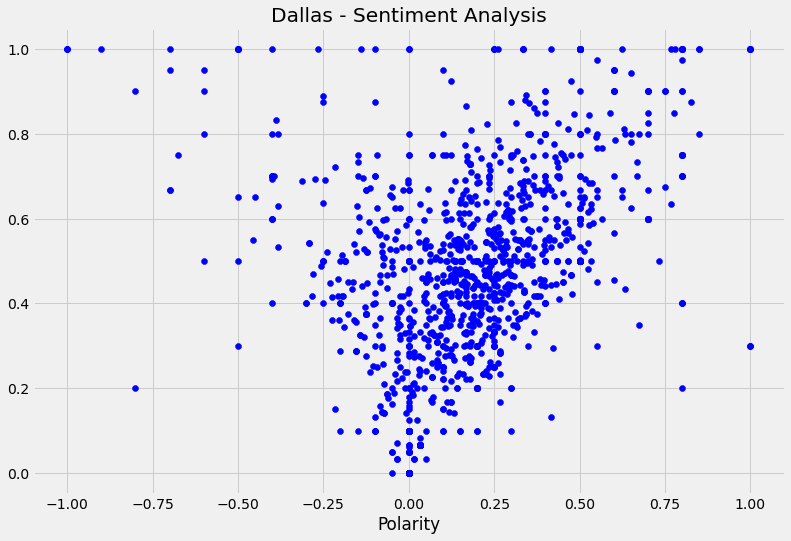

In [111]:
# plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0,df_text.shape[0]):
    plt.scatter(df_text['polarity'][i],df_text['subjectivity'][i], color='Blue')

plt.title('Dallas - Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

## Overall picture: Positive, Negative, Neutral


In [112]:
#Get the percentages: Positive, Negative, Neutral

## Percentage of Positive Tweets
ptweets = df_text[df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")


--> percentage of positive tweets: 60.1 %


In [113]:
# Get the percentage of negative tweets
ntweets = df_text[df_text.analysis == 'Negative']
ntweets = ntweets['text']

## Percentage of Negative Tweets

negativetweets = round( (ntweets.shape[0] / df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")


--> percentage of negative tweets: 14.4 %


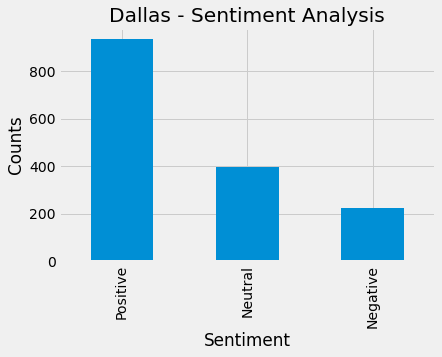

In [114]:
#Show the value counts
df_text['analysis'].value_counts()

#plot and visualize the counts
plt.title('Dallas - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['analysis'].value_counts().plot(kind='bar')

plt.show('Sentiment')



# B- Word Level Analysis

## B.1 Define Tokenized Tweets

In [115]:
# import the stopword library

from nltk.corpus import stopwords
# nltk.download('stopwords')  #need to run on a new machine

import ast  #used for literal_eval



In [116]:
import nltk
##  Add a new column "tokenized_tw" to the dataset and include the tokenized tweets
##  split content into words

df_text['tokenized_tw'] = df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# df_text['tokenized_tw'] = df_text['tokenized_tw'].tolist()

In [117]:
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,bc before corona was a major vibe dallas t...,sat apr 04 19:15:40 +0000 2020,dallas,<na>,0.5,0.0625,Positive,"[bc, before, corona, was, a, major, vibe, dall...",2020-04-04 19:15:40,4,0


In [118]:
# convert all fields to lower case
df_text = df_text.apply(lambda x: x.astype(str).str.lower())
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,bc before corona was a major vibe dallas t...,sat apr 04 19:15:40 +0000 2020,dallas,<na>,0.5,0.0625,positive,"['bc', 'before', 'corona', 'was', 'a', 'major'...",2020-04-04 19:15:40,4,0


## B.2 Apply Filters - Find/Remove Stopwords

In [119]:
# TODO double check the list of stop words, might need to use a different function later
# stop_words = stopwords.words('english')
# check what is included here 
# stop_words

In [120]:
df_text.head(2)
type(df_text['tokenized_tw'])

pandas.core.series.Series

In [121]:
## Apply filter for Stop Words { in , is, the , a, ... }
def remove_stopwords(TokenList):
  
    # Identify StopWords - get them from stopwords
    stop_words = stopwords.words('english')
    
    # convert string value to a list
    if isinstance(TokenList, str):
        TokenList = ast.literal_eval(TokenList)
 
        # TokenList = TokenList.split(",")
        for i, key in enumerate(TokenList):      
            if (key in stop_words):
                TokenList [i] = ''  
    
    return TokenList

          
nRecords = df_text['tokenized_tw'].count()
# nRecords = 3

# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(df_text['tokenized_tw'][x],str)):
        # tokenListHere = df_text['tokenized_tw'][0].split(",")
        df_text['tokenized_tw'][x] = remove_stopwords(df_text['tokenized_tw'][x])





In [122]:
# Remove 1 letter tokens
# df_text['tokenized_tw'] = df_text['tokenized_tw'].apply(lambda x: [item for item in str(x).split() if len(x) > 2])

df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,bc before corona was a major vibe dallas t...,sat apr 04 19:15:40 +0000 2020,dallas,<na>,0.5,0.0625,positive,"[bc, , corona, , , major, vibe, dallas, texas]",2020-04-04 19:15:40,4,0
1,come beat the corona w the cure new flavor ale...,thu mar 26 23:00:55 +0000 2020,dallas,comeseeus bringafriend dallas daiquiri food ba...,0.45454545454545453,0.13636363636363635,positive,"[come, beat, , corona, w, , cure, new, flavor,...",2020-03-26 23:00:55,3,0


## B.2 Apply Filters - stemming words

In [123]:
#Stemming reduces words to their root or base.
from nltk.stem.porter import PorterStemmer

In [124]:
# stemming of words
def applyporter(TokenList):
    # create an object for stemming   
    porterstemmer = PorterStemmer()
    
    # TokenList = ast.literal_eval(TokenList)
    if isinstance(TokenList, str):
         TokenList = TokenList.split(",")

    for i, key in enumerate(TokenList):            
            TokenList [i] = porterstemmer.stem(key)                       
        
    return TokenList
# tokens = word_tokenize(text)



nRecords = df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x in range(nRecords-1):
    df_text['tokenized_tw'][x] = applyporter(df_text['tokenized_tw'][x])


In [125]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,bc before corona was a major vibe dallas t...,sat apr 04 19:15:40 +0000 2020,dallas,<na>,0.5,0.0625,positive,"[bc, , corona, , , major, vibe, dalla, texa]",2020-04-04 19:15:40,4,0
1,come beat the corona w the cure new flavor ale...,thu mar 26 23:00:55 +0000 2020,dallas,comeseeus bringafriend dallas daiquiri food ba...,0.45454545454545453,0.13636363636363635,positive,"[come, beat, , corona, w, , cure, new, flavor,...",2020-03-26 23:00:55,3,0


## Return the cleaned data into a sentence format

In [126]:
## combine word into a single sentence
for  i in range(nRecords):
    if isinstance(df_text['tokenized_tw'][i],list):
        df_text['tokenized_tw'][i] = " ".join(df_text['tokenized_tw'][i])


df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,bc before corona was a major vibe dallas t...,sat apr 04 19:15:40 +0000 2020,dallas,<na>,0.5,0.0625,positive,bc corona major vibe dalla texa,2020-04-04 19:15:40,4,0
1,come beat the corona w the cure new flavor ale...,thu mar 26 23:00:55 +0000 2020,dallas,comeseeus bringafriend dallas daiquiri food ba...,0.45454545454545453,0.13636363636363635,positive,come beat corona w cure new flavor alert dai...,2020-03-26 23:00:55,3,0
2,day corona querona workout complete we winnin...,thu mar 19 21:02:22 +0000 2020,dallas,thursday thankful workout shoulders traps delt...,0.5277777777777778,0.14444444444444446,positive,day corona querona workout complet win thursd...,2020-03-19 21:02:22,3,0
3,ready to feel the energy again corona be goner...,thu mar 19 21:38:08 +0000 2020,arlington,readytoplay drums drummer drummersofinstagram ...,0.5,0.2,positive,readi feel energi corona gonereadytoplay d...,2020-03-19 21:38:08,3,0
4,tmack elitehidden gym members get ready bc hea...,sat mar 21 21:45:15 +0000 2020,allen,covid_19 quarantine corona,0.5,0.2,positive,tmack elitehidden gym member get readi bc hear...,2020-03-21 21:45:15,3,0
5,psalms dont worry god is in control and he t...,sun mar 22 17:50:13 +0000 2020,desoto,corona coronavirus sundayfunday godisgood god ...,0.0,0.0,neutral,psalm dont worri god control take care ev...,2020-03-22 17:50:13,3,0
6,corona virus quarantine got us roasting pickle...,sat apr 04 01:23:32 +0000 2020,dallas,wherethemarshmellows stayathome,0.0,0.0,neutral,corona viru quarantin got us roast pickl slice...,2020-04-04 01:23:32,4,0
7,corona athome workout day if you are interest...,fri mar 20 20:20:39 +0000 2020,dallas,<na>,0.6,0.3375,positive,corona athom workout day interest intens ...,2020-03-20 20:20:39,3,0
8,ok so ive been holding out last thursday befor...,sun mar 22 06:08:41 +0000 2020,dallas,<na>,0.39333333333333337,0.10977272727272727,positive,ok ive hold last thursday got wild coro...,2020-03-22 06:08:41,3,0
9,oluwa overdo ogidigboigbo corona can not stand...,thu apr 02 09:14:51 +0000 2020,lakeland heights,<na>,0.6,0.2333333333333333,positive,oluwa overdo ogidigboigbo corona stand oluw...,2020-04-02 09:14:51,4,0


## Create a WordCloud from cleaned tweets


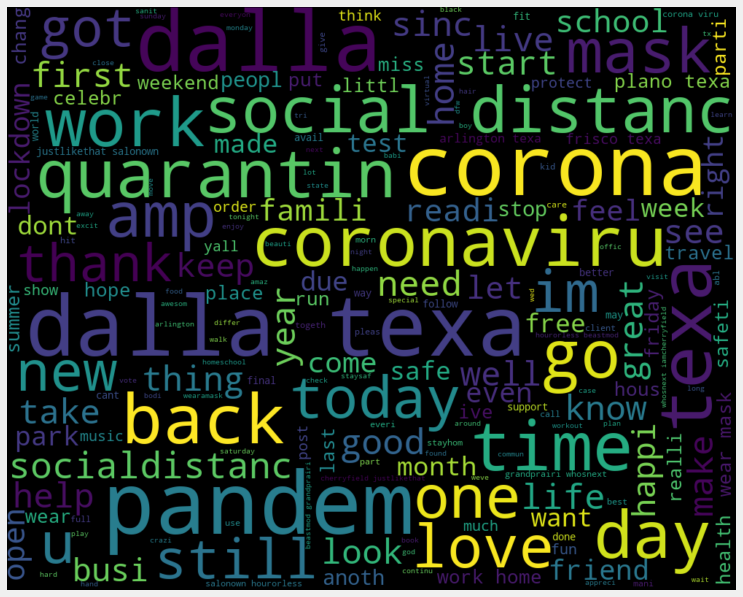

In [147]:
# visualize the most frequency used words using wordcloud

allWords = ' '.join(twts for twts in df_text['tokenized_tw'])


wordCloud = WordCloud(width=1000, height=800, random_state=21,max_font_size=119).generate(allWords)

plt.figure(figsize=(20,10))
# size the plt object

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Consider Location and Time in analysis

In [128]:

df_text.groupby(['place']).count


<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002314DE37760>>

In [129]:
from datetime import datetime
from dateutil.parser import parse


In [130]:
#create a new column for data only
df_text['date'] = df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    df_text['date'][x] = datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
    # return date as a string
    # df_text['date'][x] = datetime.strftime(datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
  
# Extract month from the data variable, Add a new column
df_text['month']  = pd.DatetimeIndex(df_text['date']).month


In [131]:
df_text. head(3)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,bc before corona was a major vibe dallas t...,sat apr 04 19:15:40 +0000 2020,dallas,<na>,0.5,0.0625,positive,bc corona major vibe dalla texa,2020-04-04 19:15:40,4,0
1,come beat the corona w the cure new flavor ale...,thu mar 26 23:00:55 +0000 2020,dallas,comeseeus bringafriend dallas daiquiri food ba...,0.45454545454545453,0.13636363636363635,positive,come beat corona w cure new flavor alert dai...,2020-03-26 23:00:55,3,0
2,day corona querona workout complete we winnin...,thu mar 19 21:02:22 +0000 2020,dallas,thursday thankful workout shoulders traps delt...,0.5277777777777778,0.14444444444444446,positive,day corona querona workout complet win thursd...,2020-03-19 21:02:22,3,0


## Data preparation for further visualizations

In [132]:

# Group by place
# placesRecords = df_text.groupby(['place'])

# get the first item in each place group
# placesRecords.first()


# remove ontario from place column
lista = df_text.place.str.split(",",expand=True)
df_text['place'] = lista [0]


# convert the polarity and subjectivity values to numbers
df_text["polarity"] = pd.to_numeric(df_text['polarity'])
df_text["subjectivity"] = pd.to_numeric(df_text['subjectivity'])


# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment = df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment = df_text.groupby('month', as_index=False)['polarity'].mean()





In [133]:
df_region_sentiment.head(5)
# df_region_sentiment.sort_values(by='polarity')

,place,polarity
0,addison,0.102920
1,allen,0.157100
2,arlington,0.152373
3,balch springs,0.188030
4,cedar hill,0.184722


<AxesSubplot:ylabel='place'>

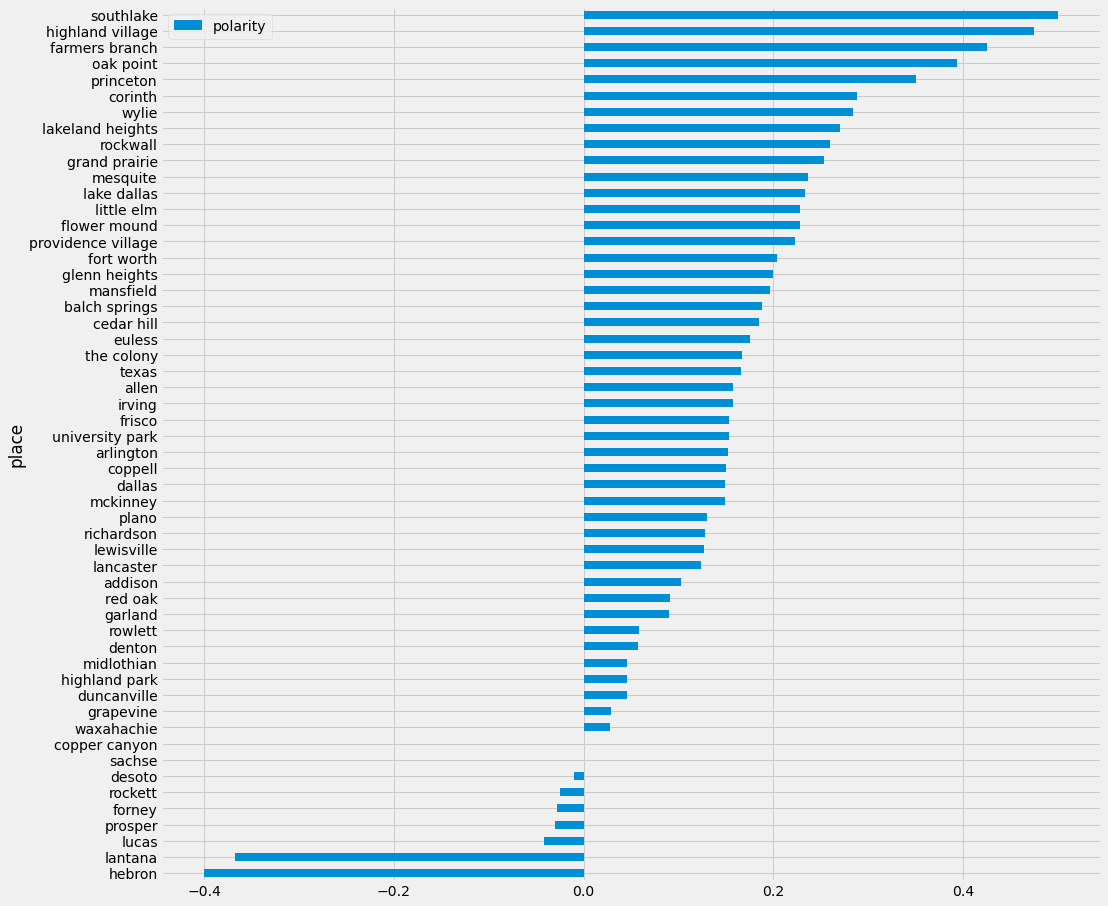

In [148]:
# Chart sentiments based on regions

#df_region_sentiment["polarity"] = pd.to_numeric(df_region_sentiment['polarity'])
df_region_sentiment.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(15, 15))





In [135]:
df_time_sentiment.head(5)

,month,polarity
0,3,0.098566
1,4,0.097904
2,5,0.161347
3,6,0.116126
4,7,0.162857


<AxesSubplot:xlabel='month'>

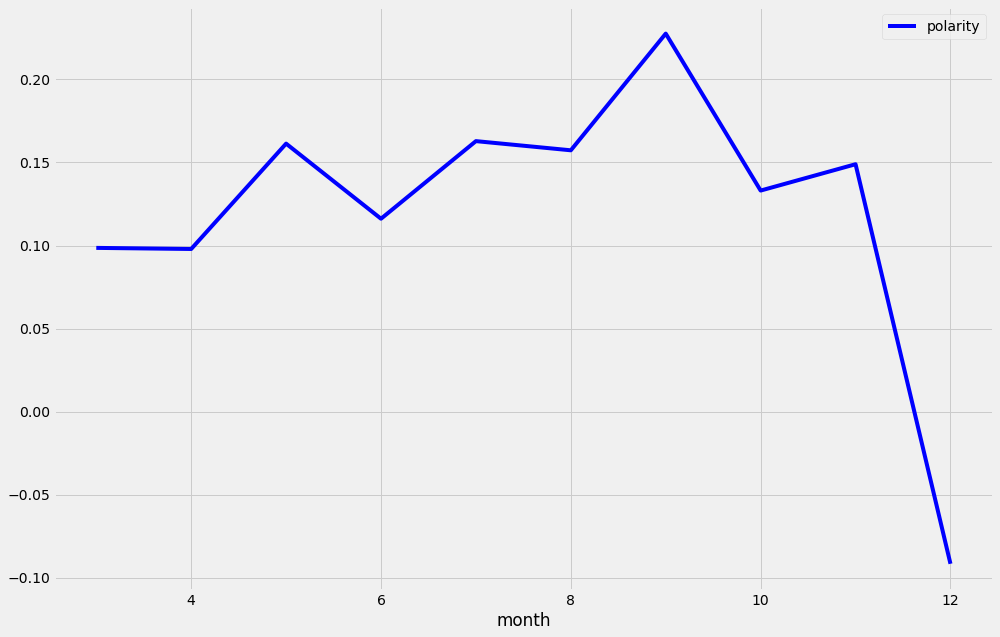

In [136]:
# Chart sentiments based on regions

df_time_sentiment.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(15, 10), color="blue")


## Extract Hashtags

In [137]:
df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,bc before corona was a major vibe dallas t...,sat apr 04 19:15:40 +0000 2020,dallas,<na>,0.500000,0.062500,positive,bc corona major vibe dalla texa,2020-04-04 19:15:40,4,0
1,come beat the corona w the cure new flavor ale...,thu mar 26 23:00:55 +0000 2020,dallas,comeseeus bringafriend dallas daiquiri food ba...,0.454545,0.136364,positive,come beat corona w cure new flavor alert dai...,2020-03-26 23:00:55,3,0
2,day corona querona workout complete we winnin...,thu mar 19 21:02:22 +0000 2020,dallas,thursday thankful workout shoulders traps delt...,0.527778,0.144444,positive,day corona querona workout complet win thursd...,2020-03-19 21:02:22,3,0
3,ready to feel the energy again corona be goner...,thu mar 19 21:38:08 +0000 2020,arlington,readytoplay drums drummer drummersofinstagram ...,0.500000,0.200000,positive,readi feel energi corona gonereadytoplay d...,2020-03-19 21:38:08,3,0
4,tmack elitehidden gym members get ready bc hea...,sat mar 21 21:45:15 +0000 2020,allen,covid_19 quarantine corona,0.500000,0.200000,positive,tmack elitehidden gym member get readi bc hear...,2020-03-21 21:45:15,3,0
5,psalms dont worry god is in control and he t...,sun mar 22 17:50:13 +0000 2020,desoto,corona coronavirus sundayfunday godisgood god ...,0.000000,0.000000,neutral,psalm dont worri god control take care ev...,2020-03-22 17:50:13,3,0
6,corona virus quarantine got us roasting pickle...,sat apr 04 01:23:32 +0000 2020,dallas,wherethemarshmellows stayathome,0.000000,0.000000,neutral,corona viru quarantin got us roast pickl slice...,2020-04-04 01:23:32,4,0
7,corona athome workout day if you are interest...,fri mar 20 20:20:39 +0000 2020,dallas,<na>,0.600000,0.337500,positive,corona athom workout day interest intens ...,2020-03-20 20:20:39,3,0
8,ok so ive been holding out last thursday befor...,sun mar 22 06:08:41 +0000 2020,dallas,<na>,0.393333,0.109773,positive,ok ive hold last thursday got wild coro...,2020-03-22 06:08:41,3,0
9,oluwa overdo ogidigboigbo corona can not stand...,thu apr 02 09:14:51 +0000 2020,lakeland heights,<na>,0.600000,0.233333,positive,oluwa overdo ogidigboigbo corona stand oluw...,2020-04-02 09:14:51,4,0


In [138]:
## Extract Hashtags
positiveHashtags = []
negativeHashtags = []


for i in range(nRecords):
    if (df_text['analysis'][i]=='positive'):
        #positive sentiment  
        if ('<na>' in df_text['hashtags'][i]):      
            continue  
        else:
            splitList = str(df_text['hashtags'][i]).split(" ")            
            positiveHashtags = positiveHashtags + splitList
    elif (df_text['analysis'][i]=='negative'):
        #negative sentiment
        if ('<na>' in df_text['hashtags'][i]):  
            continue
        else:    
            splitList = str(df_text['hashtags'][i]).split(" ")    
            negativeHashtags = negativeHashtags + splitList       
    else:
        # neutral sentiment
        continue


# positive_hashtags = df_allHashtags['hashtags']




In [139]:
# type(negativeHashtags)
# print (negativeHashtags)

#Clear up the list from unwanted hashtags
commercialHashtags = ["streetphotographer", "urbanstreetphotography","urbanstreetphotogallery","photodocumentary"
,"spicollective","cityscape","urbansteetphotogallery","ig_street","bnw","bw","lensculture","bollywood","entertainment","urbanstreetphotogallery"]


for element in negativeHashtags:
    if element in commercialHashtags:
        negativeHashtags.remove(element)

for element in positiveHashtags:
    if element in commercialHashtags:
        positiveHashtags.remove(element)        

In [140]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(negativeHashtags)
df_NegativeHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_NegativeHashtags = df_NegativeHashtags.nlargest(columns='count', n=30)                    
df_NegativeHashtags.head(20) 

,Hashtag,count
29,covid19,29
3,corona,12
4,coronavirus,11
158,dallas,8
7,socialdistancing,6
40,quarantine,5
305,wearamask,5
14,texas,4
27,bored,4
63,covid,3


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

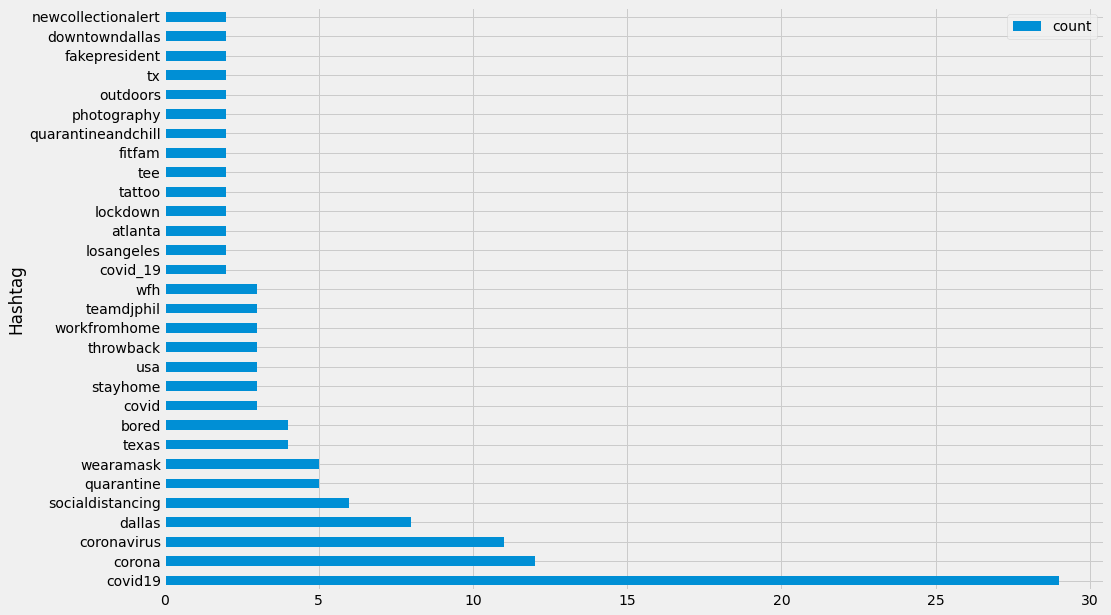

In [141]:
# display topc 20 negative tweets

plt.figure(figsize=(15,10))
df_NegativeHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))


In [142]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(positiveHashtags)
df_PositiveHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_PositiveHashtags = df_PositiveHashtags.nlargest(columns='count', n=30)       


df_PositiveHashtags.head(20) 

                 

,Hashtag,count
135,covid19,138
2,dallas,45
101,coronavirus,44
26,corona,42
41,socialdistancing,34
25,quarantine,33
891,justlikethat,32
125,covid,30
24,covid_19,29
890,cherryfields,22


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

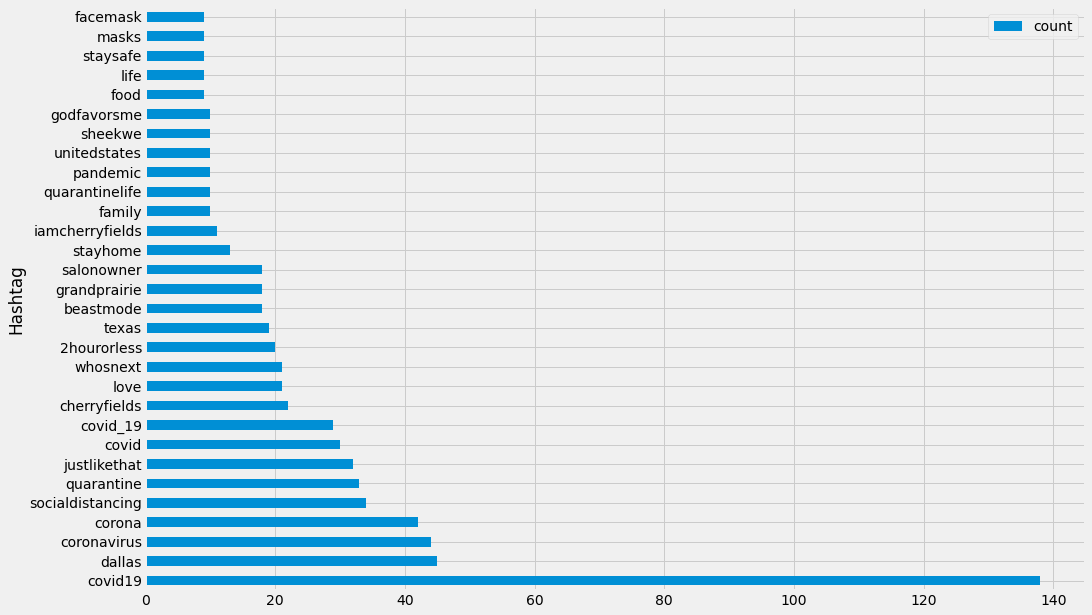

In [143]:
# display topc 20 positive tweets
plt.figure(figsize=(15,10))
df_PositiveHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))

In [144]:
# df_text['strTweets'] = df_text['text'].to_string()
# df_text.head()

In [145]:
# type(df_text['strTweets'])
# type(df_text['text'])

#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if "negative":
        return 0 
    elif 'positive':
        return 1
    else:
        return 0

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['label'] = df_text['analysis'].apply(getSentAnalysis)


In [146]:
df_text.head()

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,bc before corona was a major vibe dallas t...,sat apr 04 19:15:40 +0000 2020,dallas,<na>,0.500000,0.062500,positive,bc corona major vibe dalla texa,2020-04-04 19:15:40,4,0
1,come beat the corona w the cure new flavor ale...,thu mar 26 23:00:55 +0000 2020,dallas,comeseeus bringafriend dallas daiquiri food ba...,0.454545,0.136364,positive,come beat corona w cure new flavor alert dai...,2020-03-26 23:00:55,3,0
2,day corona querona workout complete we winnin...,thu mar 19 21:02:22 +0000 2020,dallas,thursday thankful workout shoulders traps delt...,0.527778,0.144444,positive,day corona querona workout complet win thursd...,2020-03-19 21:02:22,3,0
3,ready to feel the energy again corona be goner...,thu mar 19 21:38:08 +0000 2020,arlington,readytoplay drums drummer drummersofinstagram ...,0.500000,0.200000,positive,readi feel energi corona gonereadytoplay d...,2020-03-19 21:38:08,3,0
4,tmack elitehidden gym members get ready bc hea...,sat mar 21 21:45:15 +0000 2020,allen,covid_19 quarantine corona,0.500000,0.200000,positive,tmack elitehidden gym member get readi bc hear...,2020-03-21 21:45:15,3,0
